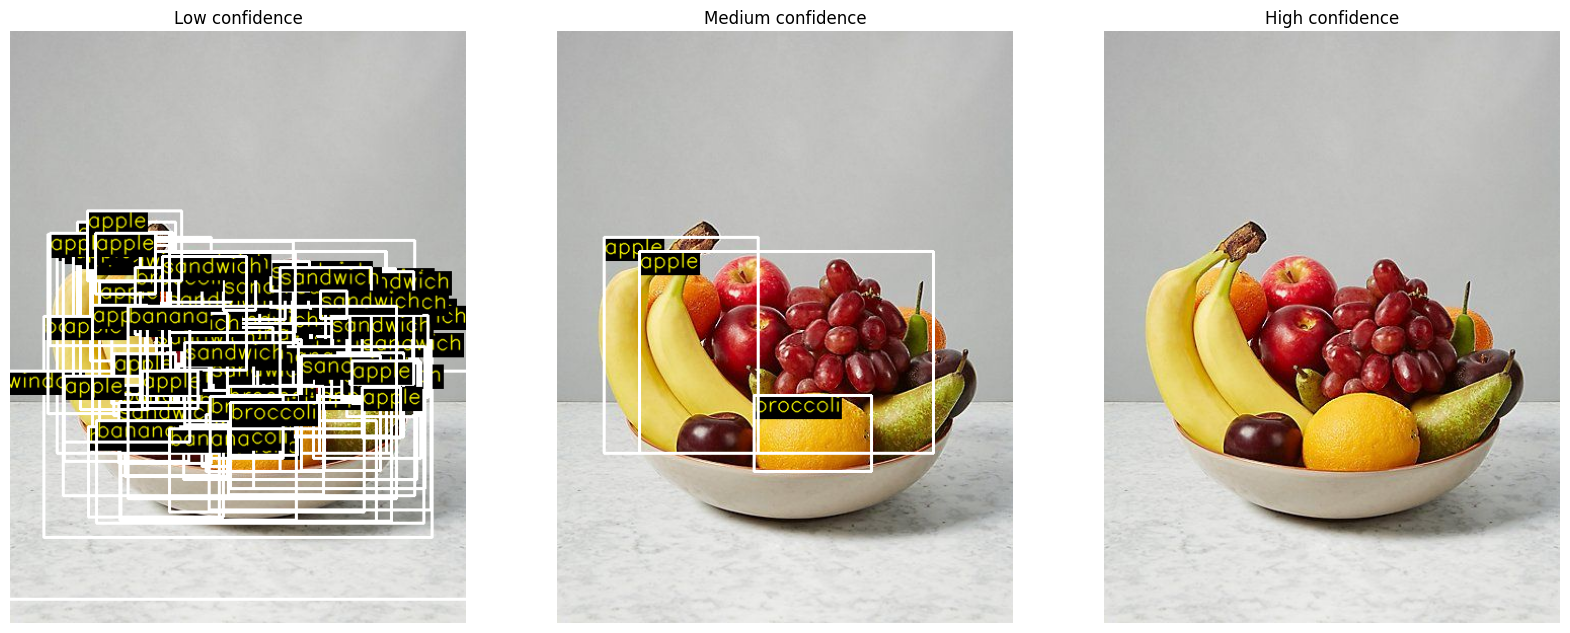

In [2]:
# Detecção de Objetos com MobileNet SSD v2 (COCO) na imagem de brinquedos

import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# Caminhos dos arquivos
modelFile = "resources/ssd_mobilenet_frozen_inference_graph.pb"
configFile = "resources/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "resources/object_detection_classes_coco.txt"
imageFile = "images/frutas.jpg"

# Carregar labels
with open(classFile) as f:
    labels = f.read().strip().split('\n')

# Carregar rede
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

# Função para detecção

def detect_objects(net, img):
    if img is None:
        print(f"Erro: não foi possível carregar a imagem em {imageFile}")
        sys.exit(1)
    blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (0, 0, 0), True)
    net.setInput(blob)
    return net.forward()

# Função para desenhar texto

def draw_text(im, text, x, y):
    fontface = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    thickness = 1
    textSize = cv2.getTextSize(text, fontface, font_scale, thickness)[0]
    baseline = cv2.getTextSize(text, fontface, font_scale, thickness)[1]
    cv2.rectangle(im, (x, y), (x + textSize[0], y + textSize[1] + baseline), (0, 0, 0), cv2.FILLED)
    cv2.putText(im, text, (x, y + textSize[1]), fontface, font_scale, (0, 255, 255), thickness, cv2.LINE_AA)

# Função para desenhar objetos com threshold

def draw_objects(im, objects, threshold=0.25):
    rows, cols = im.shape[:2]
    for i in range(objects.shape[2]):
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        if score > threshold:
            draw_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Carregar imagem e detectar
image = cv2.imread(imageFile)
detections = detect_objects(net, image)

# Aplicar diferentes thresholds
low = draw_objects(image.copy(), detections, 0.0)
mid = draw_objects(image.copy(), detections, 0.3)
high = draw_objects(image.copy(), detections, 0.9)

# Exibir comparações
plt.figure(figsize=(20, 8))
plt.subplot(131); plt.axis('off'); plt.imshow(low); plt.title('Low confidence')
plt.subplot(132); plt.axis('off'); plt.imshow(mid); plt.title('Medium confidence')
plt.subplot(133); plt.axis('off'); plt.imshow(high); plt.title('High confidence')
plt.show()
